In [1]:
base_directory = '/home/shoaib/ZTFDataChallenge/'

import sys
sys.path.insert(0, base_directory + 'dmdt_Analysis/')
from dmdt_functions import *

In [2]:
import numpy as np
import pandas as pd
from os import listdir

import warnings
warnings.filterwarnings("ignore")

from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True, nb_workers=10)

from tqdm.auto import tqdm
tqdm.pandas(desc="Lightcurves Processed")

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5)

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
plt.rcParams['axes.grid'] = False
# plt.style.use('seaborn-v0_8-colorblind')

INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [3]:
### Loading the lightcurves by name
lightcurves_by_name = pd.read_pickle(base_directory + 'lightcurves_by_name.pkl').drop(columns=['r_oids', 'g_oids'])
lightcurves_by_name_1day = pd.read_pickle(base_directory + 'lightcurves_by_name_1day_binned.pkl')[['name', 'r_n_good_det', 'r_timespan_good', 'r_lightcurve', 'g_n_good_det', 'g_timespan_good', 'g_lightcurve']]
lightcurves_by_name = lightcurves_by_name.merge(right=lightcurves_by_name_1day, how='inner', on='name', suffixes=(None, '_1day'))
lightcurves_by_name_1day = np.nan
# lightcurves_by_name = lightcurves_by_name.dropna(axis=0)
# lightcurves_by_name = lightcurves_by_name.query("type in @qso_types")
### Sampling to save memory
lightcurves_by_name = lightcurves_by_name.sample(frac=0.1)

### Loading the lightcurves by OID
lightcurves_by_oid = pd.read_pickle(base_directory + 'lightcurves_by_oid.pkl')
lightcurves_by_oid_1day = pd.read_pickle(base_directory + 'lightcurves_by_oid_1day_binned.pkl')[['oid_alerce', 'n_good_det', 'timespan_good', 'lightcurve']]
lightcurves_by_oid = lightcurves_by_oid.merge(right=lightcurves_by_oid_1day, how='inner', on='oid_alerce', suffixes=(None, '_1day'))
lightcurves_by_oid_1day = np.nan
# lightcurves_by_oid = lightcurves_by_oid.dropna(axis=0)
# lightcurves_by_oid = lightcurves_by_oid.query("type in @qso_types")
### Sampling to save memory
lightcurves_by_oid = lightcurves_by_oid.sample(frac=0.1)

In [4]:
qso_types = ['Q', 'QR', 'QX']

In [5]:
def return_differenciated_lightcurve(lightcurve):
    if isinstance(lightcurve, np.ndarray):
        time_array, magnitude_array, magnitude_err_array = lightcurve[:, 0], lightcurve[:, 1], lightcurve[:, 2]
        time_array, dmdt_array, dmdt_err_array = differentiate_1D(x_arr=time_array, y_arr=magnitude_array, yerr_arr=magnitude_err_array)
        return np.column_stack((time_array, dmdt_array, dmdt_err_array))
    return np.nan

def return_differenciated_rg_lightcurves(r_lightcurve, g_lightcurve):
    r_differenciated = return_differenciated_lightcurve(r_lightcurve)
    g_differenciated = return_differenciated_lightcurve(g_lightcurve)
    return r_differenciated, g_differenciated

In [6]:
lightcurves_by_name

,name,type,ra,dec,z,g_timespan_good,g_n_good_det,g_lightcurve,r_timespan_good,r_n_good_det,r_lightcurve,r_n_good_det_1day,r_timespan_good_1day,r_lightcurve_1day,g_n_good_det_1day,g_timespan_good_1day,g_lightcurve_1day
26620,SDSS J164554.97+530356.3,Q,251.479071,53.065664,1.20,1124.976030,719.0,"[[58203.393588, 19.4996471, 0.0840426981000000...",1129.913264,769.0,"[[58198.3922801, 19.107605, 0.0564380735], [58...",391.0,1125.839233,"[[58198.445477437504, 19.05621150552598, 0.019...",372.0,1120.992002,"[[58203.39887735, 19.457167265688813, 0.057688..."
13096,SDSS J120924.78+373501.8,Q,182.353316,37.583886,0.59,1120.954248,216.0,"[[58202.3279514, 20.5868721, 0.162438869], [58...",1112.012396,206.0,"[[58217.2347801, 20.277797699999997, 0.1540578...",171.0,1108.010301,"[[58217.250439825, 20.2860686925079, 0.0775002...",181.0,1118.933808,"[[58202.3279514, 20.5868721, 0.162438869], [58..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10693,SDSS J110233.44+552524.7,QX,165.639424,55.423600,1.45,1118.875104,221.0,"[[58205.3106134, 20.1247425, 0.140266493000000...",1111.953056,277.0,"[[58216.2323148, 20.1148643, 0.150963753], [58...",227.0,1107.984595,"[[58216.2323148, 20.1148643, 0.150963753], [58...",188.0,1116.885307,"[[58205.3122743, 20.283501663965446, 0.1082508..."
8434,SDSS J094659.89+574337.0,Q,146.749576,57.726991,1.94,1122.944641,290.0,"[[58202.2773495, 19.6035557, 0.090639576300000...",1111.996366,496.0,"[[58217.21041669999, 19.4165573, 0.0999886021]...",237.0,1107.944193,"[[58217.2330064, 19.501832013914406, 0.0534823...",228.0,1120.910116,"[[58202.2773495, 19.6035557, 0.090639576300000..."


In [7]:
lightcurves_by_name[['r_dmdt_curve', 'g_dmdt_curve']] = lightcurves_by_name.parallel_apply(lambda row: return_differenciated_rg_lightcurves(row['r_lightcurve'], row['g_lightcurve']), axis=1, result_type='expand')
lightcurves_by_name[['r_dmdt_curve_1day', 'g_dmdt_curve_1day']] = lightcurves_by_name.parallel_apply(lambda row: return_differenciated_rg_lightcurves(row['r_lightcurve_1day'], row['g_lightcurve_1day']), axis=1, result_type='expand')

lightcurves_by_oid['dmdt_curve'] = lightcurves_by_oid['lightcurve'].parallel_apply(lambda lc: return_differenciated_lightcurve(lc))
lightcurves_by_oid['dmdt_curve_1day'] = lightcurves_by_oid['lightcurve_1day'].parallel_apply(lambda lc: return_differenciated_lightcurve(lc))

In [8]:
differenciated_curves = ['r_dmdt_curve', 'g_dmdt_curve','r_dmdt_curve_1day', 'g_dmdt_curve_1day']

for key in differenciated_curves:
    series = lightcurves_by_name[key]
    

## We will plot the differenciated curves

### Lightcurves by Name

In [9]:
dm_bins = np.linspace(-1, 1, 51)
dt_bins = np.logspace(0, np.log10(1200), 51)

In [16]:
d2m_bins = np.linspace(-0.2, 0.2, 51)

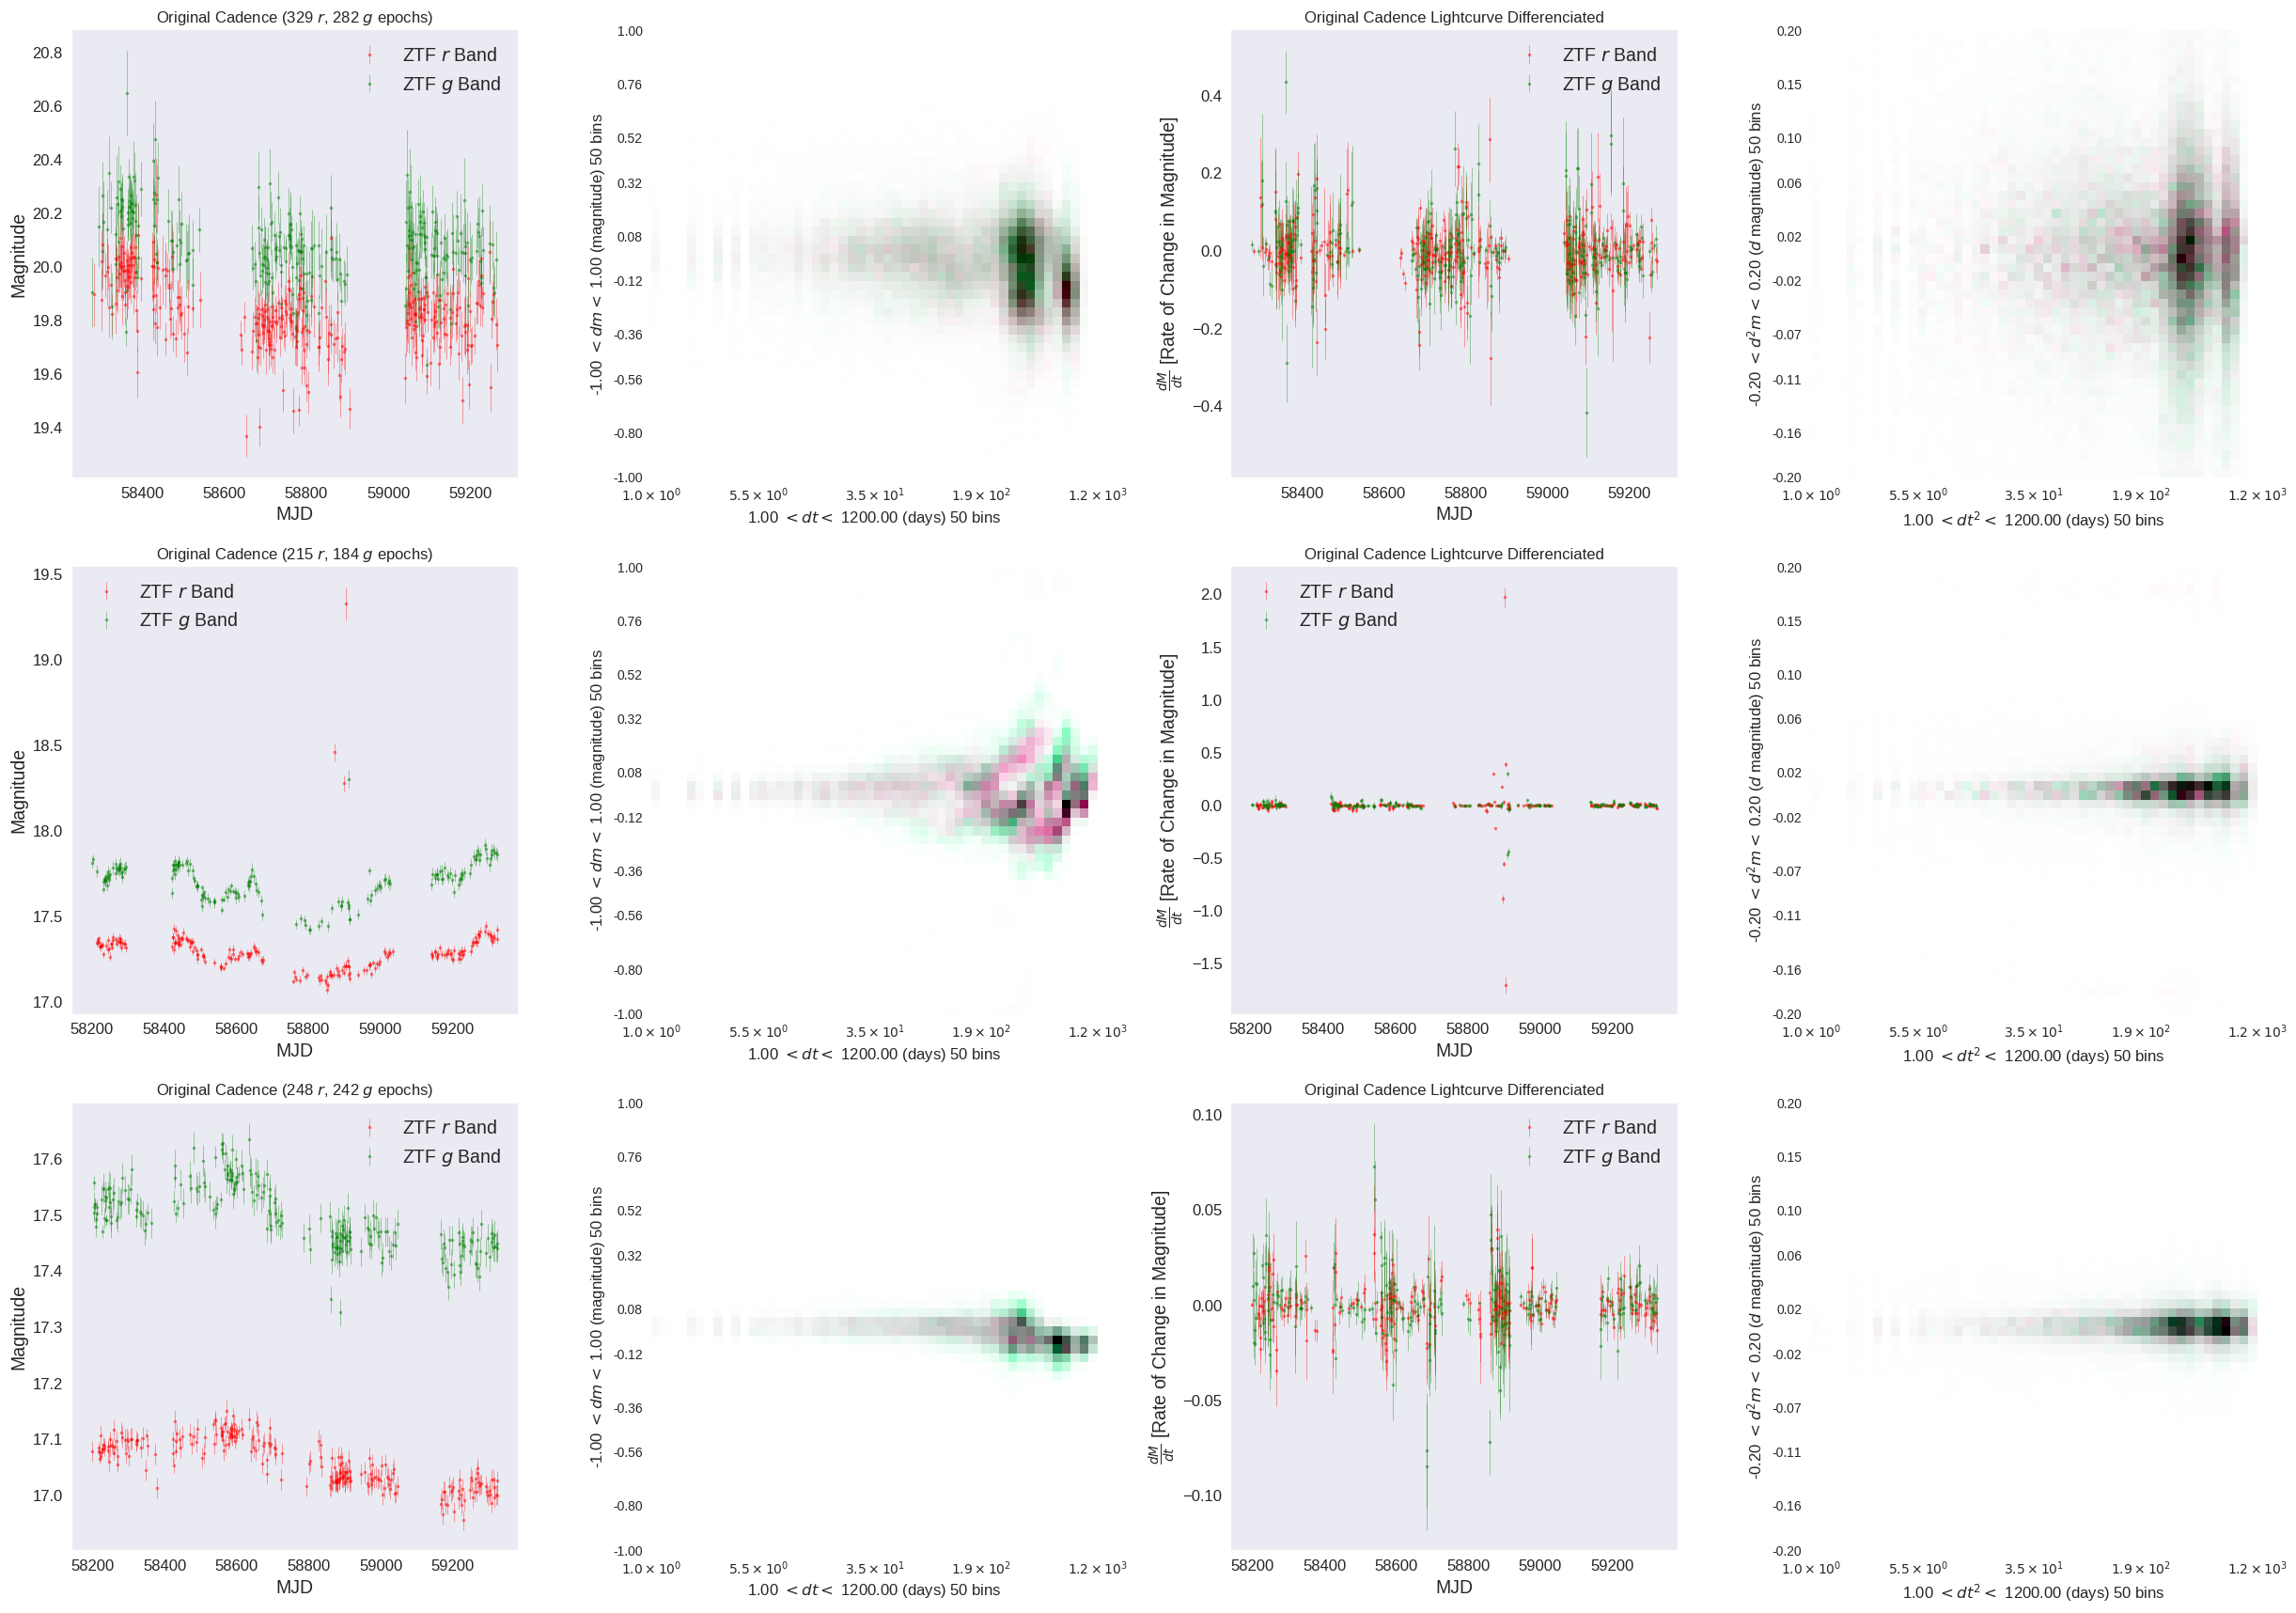

In [32]:
num_examples_per_type = 1
num_examples = num_examples_per_type * 3
sample_df = lightcurves_by_name.query("type in @qso_types")
sample_df = sample_df.groupby('type').sample(num_examples_per_type).reset_index(drop=True)

nrows, ncols = num_examples, 4
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 7.5, nrows * 5.5))

for ax_rows, (index, row) in zip(axs, sample_df.iterrows()):
    object_name = row['name']
    object_type = row['type']

    r_lightcurve_1day, g_lightcurve_1day = row['r_lightcurve_1day'], row['g_lightcurve_1day']
    r_lightcurve_diff_1day, g_lightcurve_diff_1day = row['r_dmdt_curve_1day'], row['g_dmdt_curve_1day']
    
    xlabel = axs[0,0].get_xlabel()
    ylabel = axs[0,0].get_ylabel()
    for ax in ax_rows:
        ax.legend(fontsize=10)
        ax.set_xlabel('')
        ax.set_ylabel('')

    draw_lightcurve(ax_rows[0], 'r', r_lightcurve_1day)
    draw_lightcurve(ax_rows[0], 'g', g_lightcurve_1day)
    ax_rows[0].set_title(f'Original Cadence ({r_lightcurve_1day.shape[0]} $r$, {g_lightcurve_1day.shape[0]} $g$ epochs)')

    r_dmdt_hist = get_dmdt_histogram(r_lightcurve_1day, dm_bins, dt_bins)[0]
    g_dmdt_hist = get_dmdt_histogram(g_lightcurve_1day, dm_bins, dt_bins)[0]
    dmdt_hist = return_showcase_histogram(r_dmdt_hist, g_dmdt_hist)
    draw_dmdt_rgb_histogram(ax_rows[1], dmdt_hist, dm_bins, dt_bins, dm_nticks=10, dt_nticks=5)

    draw_dmdt_curve(ax_rows[2], 'r', r_lightcurve_diff_1day)
    draw_dmdt_curve(ax_rows[2], 'g', g_lightcurve_diff_1day)
    ax_rows[2].set_title(f'Original Cadence Lightcurve Differenciated')

    r_d2mdt2_hist = get_d2mdt2_histogram(r_lightcurve_diff_1day, d2m_bins, dt_bins)[0]
    g_d2mdt2_hist = get_d2mdt2_histogram(g_lightcurve_diff_1day, d2m_bins, dt_bins)[0]
    d2mdt2_hist = return_showcase_histogram(r_d2mdt2_hist, g_d2mdt2_hist)
    draw_d2mdt2_rgb_histogram(ax_rows[3], d2mdt2_hist, d2m_bins, dt_bins, d2m_nticks=10, dt2_nticks=5)

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.2, wspace=0.3)
plt.show()

In [ ]:
def plot_single_subfig(subfig, ncols, row):
    object_name = row['name']
    object_type = row['type']

    r_lightcurve, g_lightcurve = row['r_lightcurve'], row['g_lightcurve']
    r_lightcurve_diff, g_lightcurve_diff = row['r_lightcurve_differenciated'], row['g_lightcurve_differenciated']

    r_lightcurve_1day, g_lightcurve_1day = row['r_lightcurve_1day'], row['g_lightcurve_1day']
    r_lightcurve_diff_1day, g_lightcurve_diff_1day = row['r_lightcurve_1day_differenciated'], row['g_lightcurve_1day_differenciated']

    subfig.suptitle(f'{object_name} | Type: {object_type}', size=16, y=1.02)
    
    axs = subfig.subplots(nrows=1, ncols=ncols)
    subfig.subplots_adjust(wspace=0.3)
    
    draw_lightcurve(axs[0], 'r', r_lightcurve)
    draw_lightcurve(axs[0], 'g', g_lightcurve)
    axs[0].set_title(f'Original Cadence ({r_lightcurve.shape[0]} $r$, {g_lightcurve.shape[0]} $g$ epochs)')

    draw_dmdt_curve(axs[1], 'r', r_lightcurve_diff)
    draw_dmdt_curve(axs[1], 'g', g_lightcurve_diff)
    axs[1].set_title(f'Original Cadence Lightcurve Differenciated')


    draw_lightcurve_single_band(axs[2], 'r', r_lightcurve_1day)
    draw_lightcurve_single_band(axs[2], 'g', g_lightcurve_1day)
    axs[2].set_title(f'1-Day Cadence ({r_lightcurve_1day.shape[0]} $r$, {g_lightcurve_1day.shape[0]} $g$ epochs)')


    draw_d2m_dt2_timeseries_single_band(axs[3], 'r', r_lightcurve_diff_1day)
    draw_d2m_dt2_timeseries_single_band(axs[3], 'g', g_lightcurve_diff_1day)
    axs[3].set_title(f'1-Day Cadence Lightcurve Differenciated')

    return axs

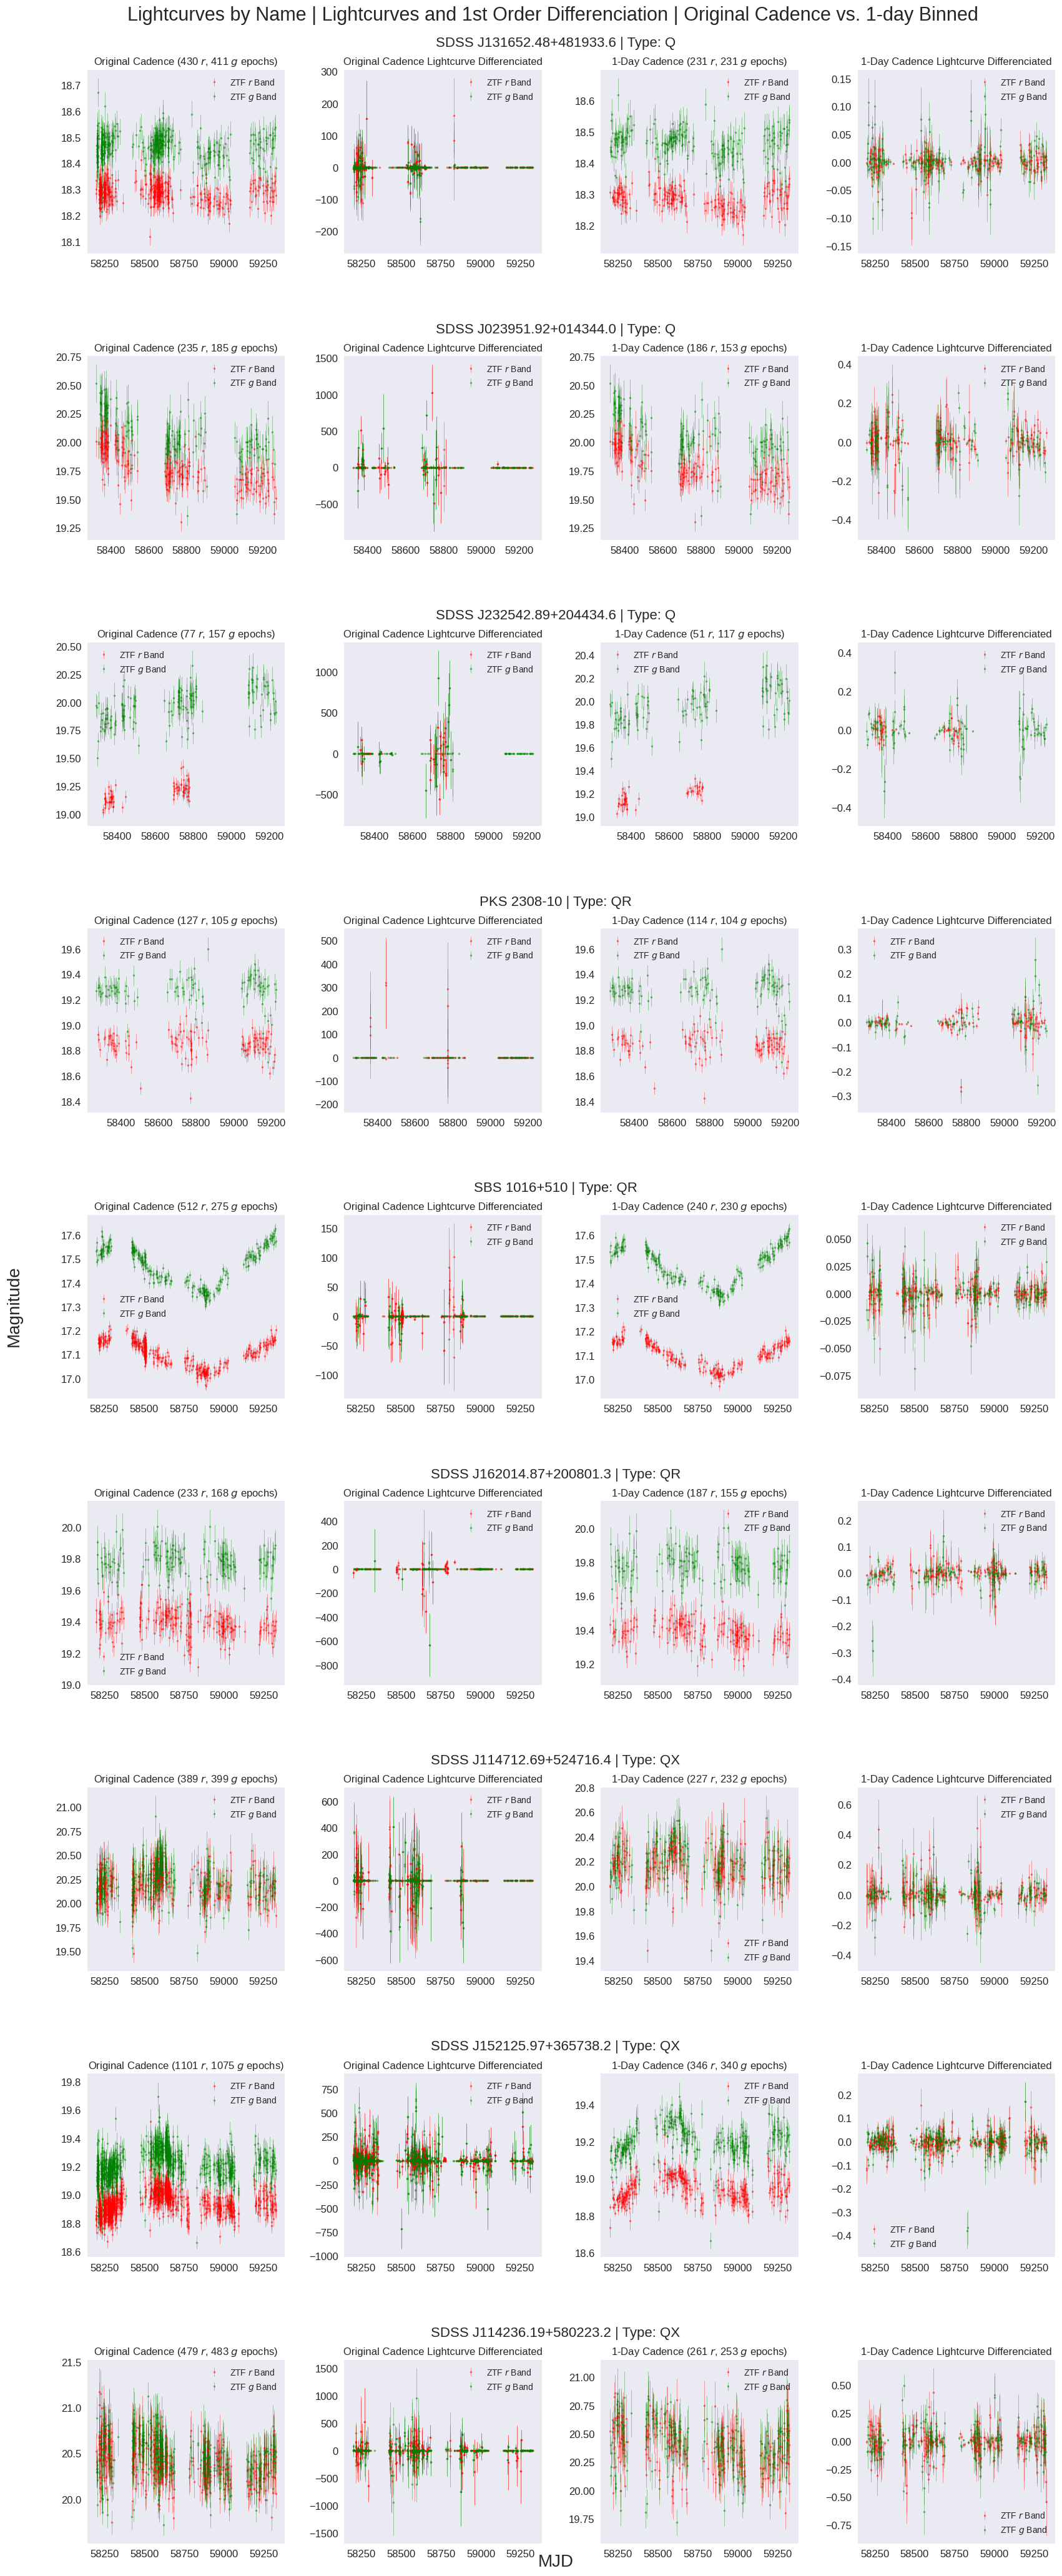

In [9]:
num_examples_per_type = 3
num_examples = num_examples_per_type * 3
sample_df = lightcurves_by_name.query("type in @qso_types")
sample_df = sample_df.groupby('type').sample(num_examples_per_type).reset_index(drop=True)

nrows, ncols = num_examples, 4
fig = plt.figure(figsize=(ncols * 5, nrows * 4.5))
subfigs = fig.subfigures(nrows=nrows, ncols=1, hspace=0.2)

for i, (index, row) in enumerate(sample_df.iterrows()):
    axs = plot_single_subfig(subfigs[i], ncols=ncols, row=row)
    xlabel = axs[0].get_xlabel()
    ylabel = axs[0].get_ylabel()
    for ax in axs:
        ax.legend(fontsize=10)
        ax.set_xlabel('')
        ax.set_ylabel('')

fig.suptitle('Lightcurves by Name | Lightcurves and 1st Order Differenciation | Original Cadence vs. 1-day Binned ', size=22, y=1.014)
fig.supxlabel(xlabel, size=20, y=0)
fig.supylabel(ylabel, size=20, x=0.06)

# plt.tight_layout()
plt.show()

### Lightcurves by OID

In [10]:
def plot_single_subfig(subfig, ncols, row):
    oid = row['oid_alerce']
    band = row['band']
    object_name = row['name']
    object_type = row['type']

    lightcurve = row['lightcurve']
    lightcurve_diff = row['lightcurve_differenciated']

    lightcurve_1day = row['lightcurve_1day']
    lightcurve_diff_1day = row['lightcurve_1day_differenciated']

    subfig.suptitle(f'{oid} | {object_name} | Type: {object_type}', size=16, y=1.02)

    axs = subfig.subplots(nrows=1, ncols=ncols)
    subfig.subplots_adjust(wspace=0.3)
    
    draw_lightcurve_single_band(axs[0], band, lightcurve)
    axs[0].set_title(f'Original Cadence ({lightcurve.shape[0]} ${band}$ epochs)')

    draw_d2m_dt2_timeseries_single_band(axs[1], band, lightcurve_diff)
    axs[1].set_title(f'Original Cadence Lightcurve Differenciated')

    draw_lightcurve_single_band(axs[2], band, lightcurve_1day)
    axs[2].set_title(f'1-Day Cadence ({lightcurve_1day.shape[0]} ${band}$ epochs)')

    draw_d2m_dt2_timeseries_single_band(axs[3], band, lightcurve_diff_1day)
    axs[3].set_title(f'1-Day Cadence Lightcurve Differenciated')

    return axs

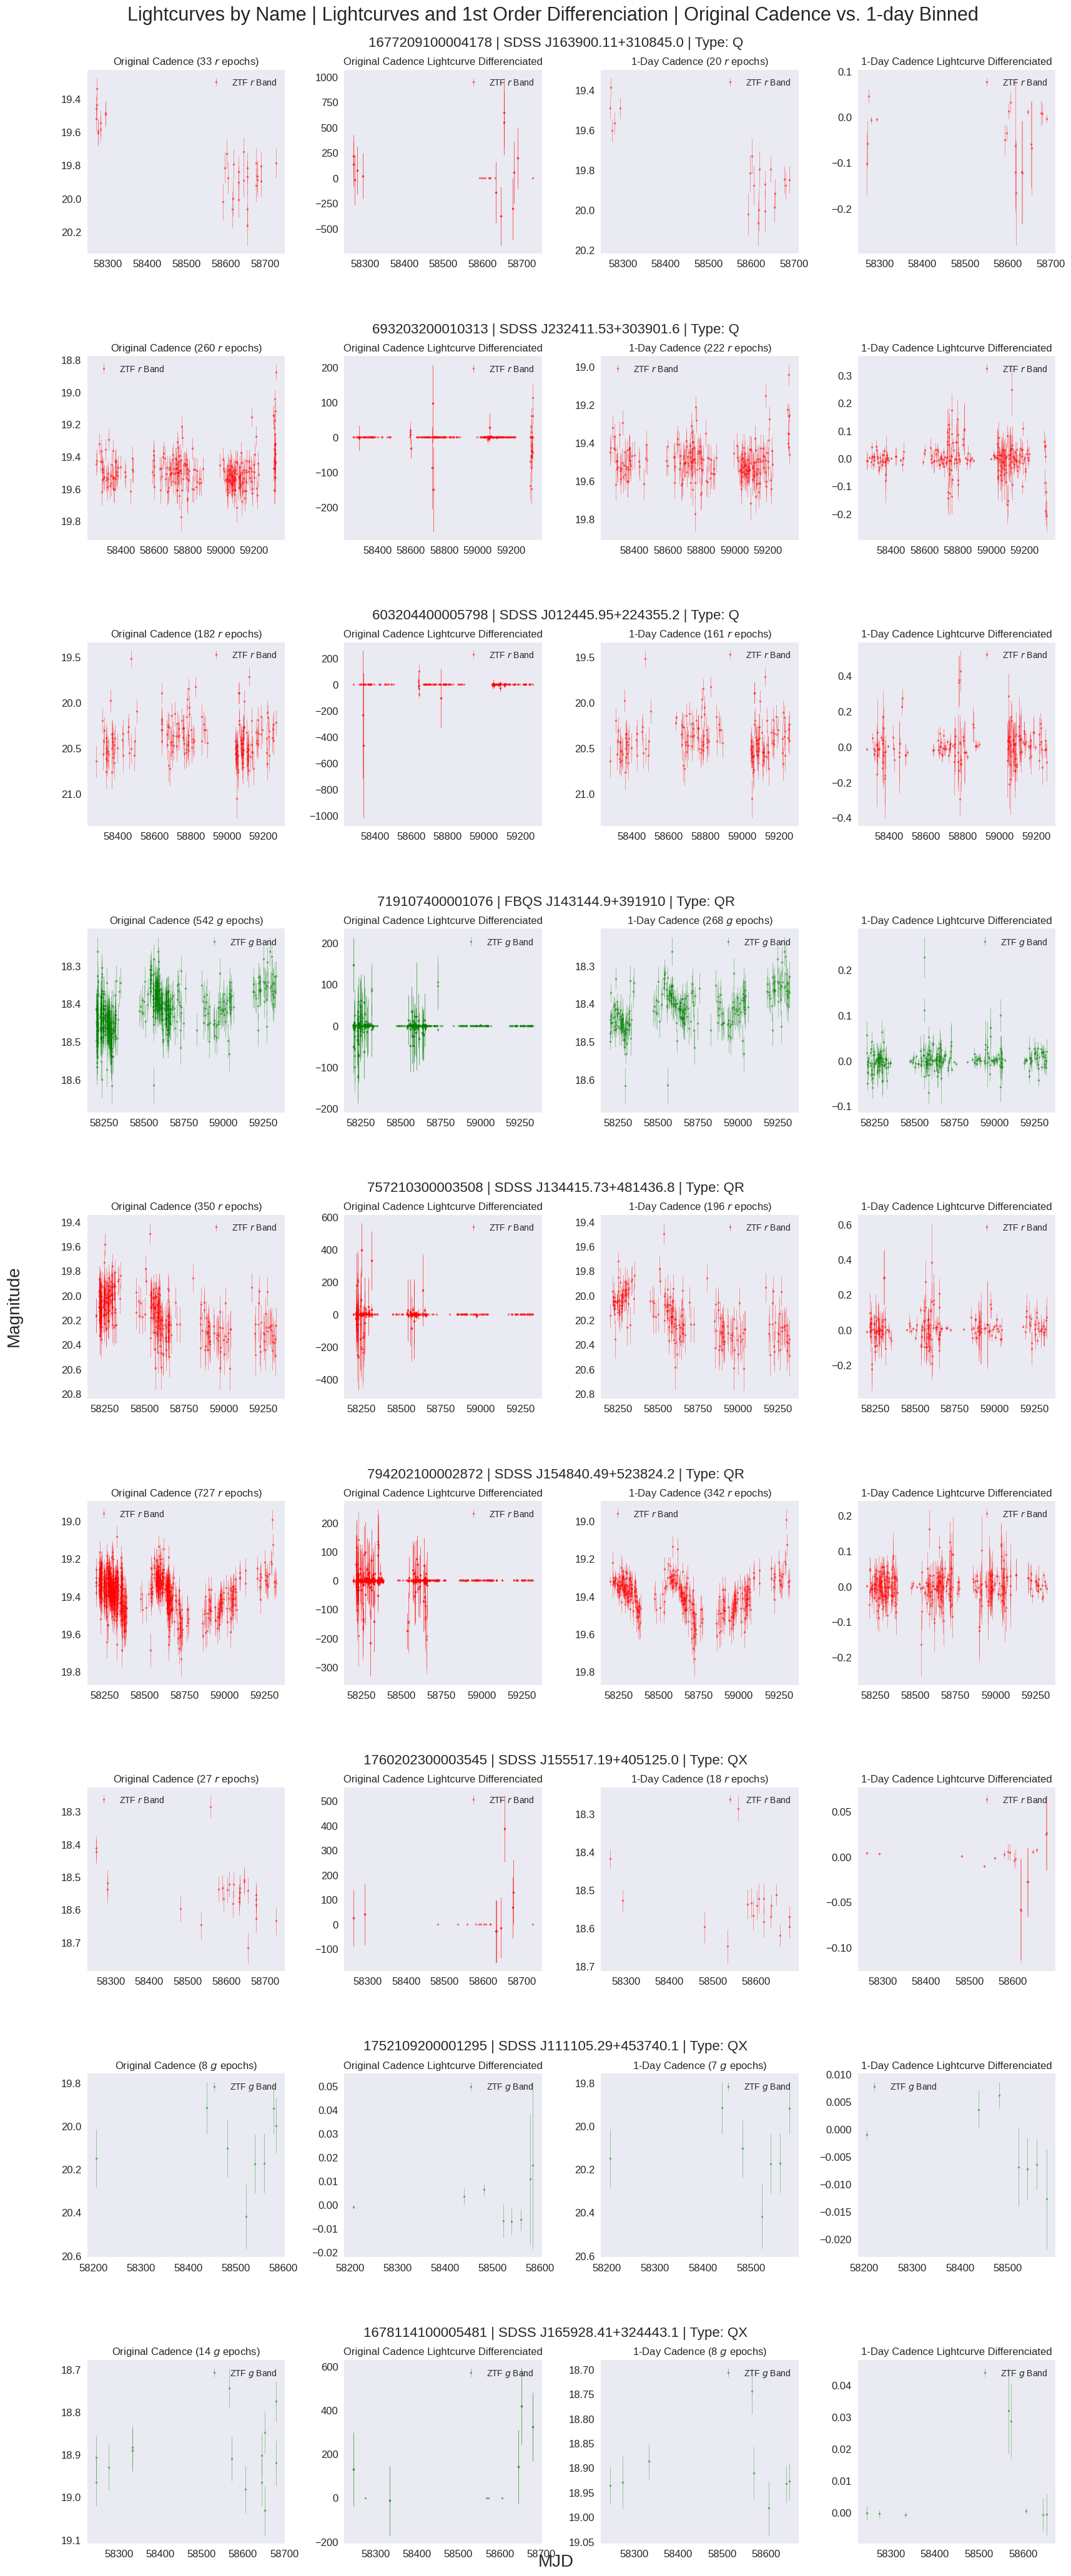

In [11]:
num_examples_per_type = 3
num_examples = num_examples_per_type * 3
sample_df = lightcurves_by_oid.query("type in @qso_types")
sample_df = sample_df.groupby('type').sample(num_examples_per_type).reset_index(drop=True)

nrows, ncols = num_examples, 4
fig = plt.figure(figsize=(ncols * 5, nrows * 4.5))
subfigs = fig.subfigures(nrows=nrows, ncols=1, hspace=0.2)

for i, (index, row) in enumerate(sample_df.iterrows()):
    axs = plot_single_subfig(subfigs[i], ncols=ncols, row=row)
    xlabel = axs[0].get_xlabel()
    ylabel = axs[0].get_ylabel()
    for ax in axs:
        ax.legend(fontsize=10)
        ax.set_xlabel('')
        ax.set_ylabel('')

fig.suptitle('Lightcurves by Name | Lightcurves and 1st Order Differenciation | Original Cadence vs. 1-day Binned ', size=22, y=1.014)
fig.supxlabel(xlabel, size=20, y=0)
fig.supylabel(ylabel, size=20, x=0.06)

# plt.tight_layout()
plt.show()

## Saving our curves

In [12]:
lightcurves_by_name

,name,type,ra,dec,z,g_timespan_good,g_n_good_det,g_lightcurve,r_timespan_good,r_n_good_det,r_lightcurve,r_n_good_det_1day,r_timespan_good_1day,r_lightcurve_1day,g_n_good_det_1day,g_timespan_good_1day,g_lightcurve_1day,r_lightcurve_differenciated,g_lightcurve_differenciated,r_lightcurve_1day_differenciated,g_lightcurve_1day_differenciated
0,1AXG J000605+2031,AX,1.497482,20.523582,0.38,964.688067,229.0,"[[58268.4661921, 17.2914085, 0.0193178076], [5...",981.708229,222.0,"[[58268.4470486, 17.2935829, 0.0198369212], [5...",206.0,59231.151376,"[[58268.4470486, 17.2935829, 0.0198369212], [5...",211.0,59231.123367,"[[58268.4661921, 17.2914085, 0.0193178076], [5...","[[58268.4470486, -0.005716248523717843, 0.0093...","[[58268.4661921, 0.0011050910692161112, 0.0030...","[[58268.4470486, -0.005716248523717843, 0.0093...","[[58268.4661921, 0.0011050910692161112, 0.0030..."
1,1AXG J035008-1149,AX,57.522460,-11.824012,0.45,376.989526,10.0,"[[58390.4113657, 19.8996181, 0.129595727], [58...",340.960799,6.0,"[[58432.3809954, 19.886844600000003, 0.1277610...",4.0,58748.350956,"[[58432.3809954, 19.886844600000003, 0.1277610...",5.0,58749.398570,"[[58390.4113657, 19.8996181, 0.129595727], [58...","[[58432.3809954, -0.013191566873275206, 0.0253...","[[58390.4113657, 5.986729220209945e-06, 0.0045...","[[58432.3809954, -0.013191566873275206, 0.0253...","[[58390.4113657, 5.986729220209945e-06, 0.0045..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32229,eHAQ0142+0257,QR,25.528603,2.953628,2.31,957.648796,214.0,"[[58298.4827431, 18.9552612, 0.063075698899999...",962.719190,342.0,"[[58301.4430787, 17.906868, 0.0333674327], [58...",184.0,59256.145787,"[[58301.4430787, 17.906868, 0.0333674327], [58...",192.0,59254.095685,"[[58298.4827431, 18.9552612, 0.063075698899999...","[[58301.4430787, -0.002057586551924358, 0.0042...","[[58298.4827431, -0.07831337545763786, 0.02759...","[[58301.4430787, -0.002057586551924358, 0.0042...","[[58298.4827431, -0.07831337545763786, 0.02759..."
32230,eHAQ0147+1549,BRX,26.820357,15.828883,0.37,959.672581,416.0,"[[58300.4637847, 19.7455463, 0.107512668], [58...",982.677836,886.0,"[[58288.4649769, 18.7370911, 0.060006402400000...",306.0,59267.128717,"[[58288.472511600005, 18.733430887729455, 0.04...",213.0,59256.120986,"[[58300.4637847, 19.7455463, 0.107512668], [58...","[[58288.4649769, -0.4402165979696525, 5.360800...","[[58300.4637847, -0.023360394574471588, 0.1390...","[[58288.472511600005, 0.06091451918753592, 0.0...","[[58300.4637847, -0.023360394574471588, 0.1390..."


In [14]:
dmdt_lightcurves_by_name = lightcurves_by_name[['name', 'type', 'z', 'ra', 'dec', 'r_lightcurve_differenciated', 'g_lightcurve_differenciated', 'r_lightcurve_1day_differenciated', 'g_lightcurve_1day_differenciated']]
dmdt_lightcurves_by_name = dmdt_lightcurves_by_name.rename(columns={'r_lightcurve_differenciated': 'r_dmdt_curve',
                                                                    'r_lightcurve_1day_differenciated': 'r_dmdt_curve_1day',
                                                                    'g_lightcurve_differenciated': 'g_dmdt_curve',
                                                                    'g_lightcurve_1day_differenciated': 'g_dmdt_curve_1day'})
dmdt_lightcurves_by_name.to_pickle(base_directory + 'dmdt_curves_by_name.pkl')

In [13]:
dmdt_lightcurves_by_oid = lightcurves_by_oid[['name', 'type', 'z', 'ra', 'dec', 'oid_alerce', 'lightcurve_differenciated', 'lightcurve_1day_differenciated']]
dmdt_lightcurves_by_oid = dmdt_lightcurves_by_oid.rename(columns={'lightcurve_differenciated': 'dmdt_curve',
                                                                 'lightcurve_1day_differenciated': 'dmdt_curve_1day'})
dmdt_lightcurves_by_oid.to_pickle(base_directory + 'dmdt_curves_by_oid.pkl')